<a href="https://colab.research.google.com/github/olatnattantalo/colabdeeplearning/blob/master/notebooks/Deep_Learning_com_Google_Colab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch; torch.manual_seed(0)
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

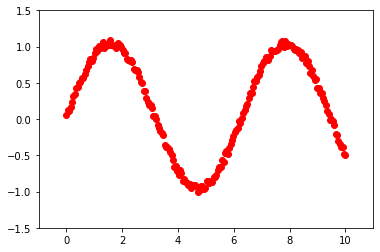

In [0]:
length = 200
x = torch.linspace(0, 10, length).reshape(length, 1)
y = torch.sin(x) + 0.1 * torch.rand(x.size())

x_plot = x.data.numpy().copy()
y_plot = y.data.numpy().copy()

plt.scatter(x_plot, y_plot, c='r')
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)
plt.show()

In [0]:
class SingleHidden(torch.nn.Module):
    def __init__(self, n_hidden):
        super(SingleHidden, self).__init__()
        self.hidden = torch.nn.Linear(1, n_hidden)
        self.relu = torch.nn.ReLU()
        self.output = torch.nn.Linear(n_hidden, 1)

    def forward(self, x):
        out = self.hidden(x)
        out = self.relu(out)
        out = self.output(out)

        return out

In [0]:
n_epoch = 200
learning_rate = 0.01

model = SingleHidden(5)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_func = torch.nn.MSELoss()

In [0]:
frame = 5
predictions = []

for epoch in range(n_epoch):
    y_preds = []
    for i in range(x.size()[0]):
        y_pred = model(x[i])
        loss = loss_func(y_pred, y[i])
        y_preds.append(y_pred.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
	    print(f'Epoch {epoch + 1}. Loss: {loss.item():.4f}')

    if epoch % frame == 0:
	    predictions.append(y_preds)

Epoch 10. Loss: 0.0023
Epoch 20. Loss: 0.0048
Epoch 30. Loss: 0.0076
Epoch 40. Loss: 0.0147
Epoch 50. Loss: 0.0541
Epoch 60. Loss: 0.4199
Epoch 70. Loss: 0.2728
Epoch 80. Loss: 0.1453
Epoch 90. Loss: 0.1122
Epoch 100. Loss: 0.1002
Epoch 110. Loss: 0.0950
Epoch 120. Loss: 0.0932
Epoch 130. Loss: 0.0934
Epoch 140. Loss: 0.0952
Epoch 150. Loss: 0.0977
Epoch 160. Loss: 0.1019
Epoch 170. Loss: 0.1071
Epoch 180. Loss: 0.1146
Epoch 190. Loss: 0.1272
Epoch 200. Loss: 0.1556


In [0]:
fig,  ax = plt.subplots()
plt.close()
ax.set_xlim(-1, 11)
ax.set_ylim(-1.5, 1.5)

train_data, = ax.plot([], [], 'ro')
fitted_line, = ax.plot([], [], 'g-')

def init():
    train_data.set_data(x_plot, y_plot)
    return (train_data,)

def animate(i):
    train_data.set_data(x_plot, predictions[i])
    return (fitted_line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=n_epoch//frame, interval=n_epoch//frame,
                                blit=True)

rc('animation', html='jshtml')

anim

In [0]:
class DoubleHidden(torch.nn.Module):
    def __init__(self, n_hidden1, n_hidden2):
        super(DoubleHidden, self).__init__()
        self.hidden1 = torch.nn.Linear(1, n_hidden1)
        self.relu1 = torch.nn.ReLU()
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.relu2 = torch.nn.ReLU()
        self.output = torch.nn.Linear(n_hidden2, 1)

    def forward(self, x):
        out = self.hidden1(x)
        out = self.relu1(out)
        out = self.hidden2(out)
        out = self.relu2(out)
        out = self.output(out)

        return out

In [0]:
n_epoch = 600
learning_rate = 0.0005

model = DoubleHidden(10, 20)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_func = torch.nn.MSELoss()

In [0]:
frame = 5
predictions = []

for epoch in range(n_epoch):
    y_preds = []
    for i in range(x.size()[0]):
        y_pred = model(x[i])
        loss = loss_func(y_pred, y[i])
        y_preds.append(y_pred.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
	    print(f'Epoch {epoch + 1}. Loss: {loss.item():.4f}')

    if epoch % frame == 0:
	    predictions.append(y_preds)

Epoch 10. Loss: 0.4531
Epoch 20. Loss: 0.4363
Epoch 30. Loss: 0.4375
Epoch 40. Loss: 0.4451
Epoch 50. Loss: 0.4515
Epoch 60. Loss: 0.4542
Epoch 70. Loss: 0.4538
Epoch 80. Loss: 0.4516
Epoch 90. Loss: 0.4566
Epoch 100. Loss: 0.4619
Epoch 110. Loss: 0.4588
Epoch 120. Loss: 0.4582
Epoch 130. Loss: 0.4602
Epoch 140. Loss: 0.4633
Epoch 150. Loss: 0.4667
Epoch 160. Loss: 0.4711
Epoch 170. Loss: 0.4746
Epoch 180. Loss: 0.4775
Epoch 190. Loss: 0.4812
Epoch 200. Loss: 0.4843
Epoch 210. Loss: 0.4877
Epoch 220. Loss: 0.4915
Epoch 230. Loss: 0.4953
Epoch 240. Loss: 0.5139
Epoch 250. Loss: 0.5165
Epoch 260. Loss: 0.5186
Epoch 270. Loss: 0.5196
Epoch 280. Loss: 0.5202
Epoch 290. Loss: 0.5194
Epoch 300. Loss: 0.5160
Epoch 310. Loss: 0.5113
Epoch 320. Loss: 0.5025
Epoch 330. Loss: 0.4923
Epoch 340. Loss: 0.4789
Epoch 350. Loss: 0.4621
Epoch 360. Loss: 0.4422
Epoch 370. Loss: 0.4196
Epoch 380. Loss: 0.3934
Epoch 390. Loss: 0.3644
Epoch 400. Loss: 0.3339
Epoch 410. Loss: 0.3022
Epoch 420. Loss: 0.2694
E

In [0]:
fig,  ax = plt.subplots()
plt.close()
ax.set_xlim(-1, 11)
ax.set_ylim(-1.5, 1.5)

train_data, = ax.plot([], [], 'ro')
fitted_line, = ax.plot([], [], 'g-')

def init():
    train_data.set_data(x_plot, y_plot)
    return (train_data,)

def animate(i):
    train_data.set_data(x_plot, predictions[i])
    return (fitted_line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=n_epoch//frame, interval=n_epoch//frame,
                                blit=True)

rc('animation', html='jshtml')

anim